In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# Read data
myData = pd.read_csv('Lecture15_data.csv')

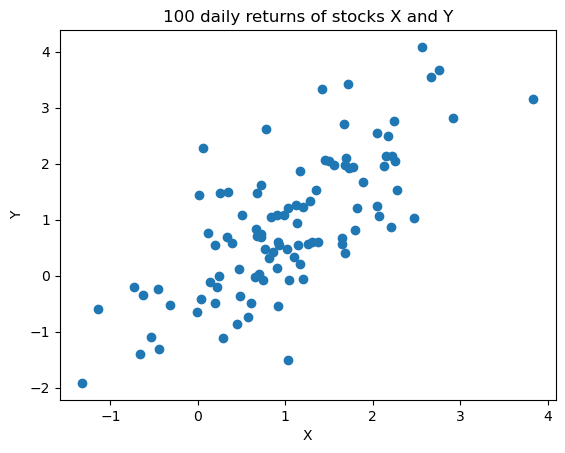

In [3]:
# Plot the data
plt.scatter(myData['X'], myData['Y'])
plt.title("100 daily returns of stocks X and Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [4]:
# Run linear regression
X = myData['X']
Y = myData['Y']
X_with_intercept = sm.add_constant(X)  # Add a constant term to the X matrix
model = sm.OLS(Y, X_with_intercept).fit()
print(model.summary())
print("Variance of residuals ",model.scale)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     115.5
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           2.90e-18
Time:                        14:29:58   Log-Likelihood:                -123.66
No. Observations:                 100   AIC:                             251.3
Df Residuals:                      98   BIC:                             256.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1157      0.127     -0.914      0.3

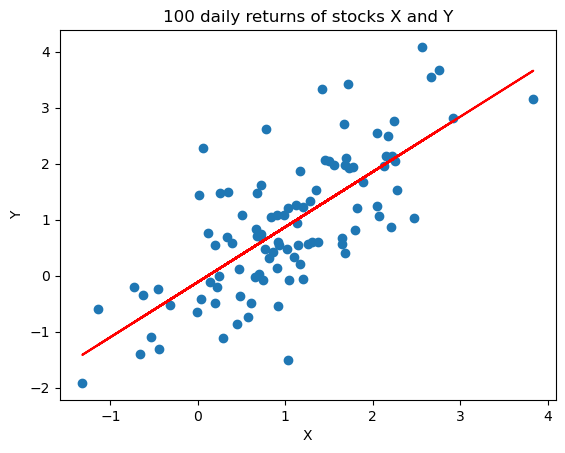

In [5]:
# Plot the estimated regression line
plt.scatter(myData['X'], myData['Y'])
plt.title("100 daily returns of stocks X and Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(myData['X'], model.predict(X_with_intercept), color='red')
plt.show()

In [6]:
# Get coefficients
coef = model.params
print(coef)

const   -0.115741
X        0.984257
dtype: float64


In [10]:
# Make predictions
new_data = pd.DataFrame({'const': 1, 'X': [2]})
Y_hat = model.get_prediction(exog=new_data).summary_frame(alpha=0.05)
print(Y_hat)

       mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  1.852774  0.122226       1.610219       2.095328      0.164708   

   obs_ci_upper  
0      3.540839  
